In [ ]:
#ANALYSIS:
 #-- Capumolin & Ramicane are most effective.
 #-- The strong r-value correlation solidifies that the heavier the mouse weighs, the drug becomes less effective.
 #-- 1 outlier in the dataset shows the study to be reliable.

# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results.sample(10)

# Combine the data into a single dataset
single_dataset = pd.merge(mouse_metadata, study_results, on='Mouse ID') 
# Display the data table for preview
single_dataset.sample(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1615,v339,Infubinol,Male,20,26,0,45.000000,0
78,z578,Ramicane,Male,11,16,15,38.688516,0
1410,q511,Zoniferol,Female,2,28,15,52.133081,0
1498,s152,Placebo,Female,4,30,25,64.119142,2
312,j246,Capomulin,Female,21,21,10,46.408361,0
480,a262,Placebo,Female,17,29,30,64.958092,3
217,w914,Capomulin,Male,24,21,10,43.231963,0
1123,l661,Ceftamin,Male,18,26,0,45.000000,0
766,e213,Naftisol,Male,8,27,5,45.699250,1
561,a818,Naftisol,Female,12,28,15,51.227566,0


In [24]:
# Checking the number of mice.
mice=Combined_data["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [25]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = Combined_data.loc[Combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [26]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse_id=pd.DataFrame(duplicate_mice)
all_duplicate_mouse_id

,0
0,g989


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = Combined_data[Combined_data['Mouse ID'].isin(duplicate_mice)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [28]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice

248

## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_mean


regimen_median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_median


regimen_variance = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_variance


regimen_std = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_std

regimen_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
regimen_sem


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.





Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [30]:
summary_stats_table = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})
summary_stats_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats_table = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})
summary_stats_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

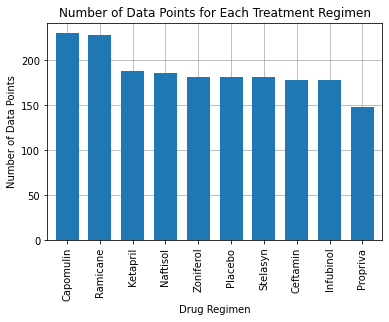

In [32]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_plot = clean_df['Drug Regimen'].value_counts().plot.bar(width=0.7, zorder=3)
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Data Points")
bar_plot.set_title("Number of Data Points for Each Treatment Regimen")

bar_plot.grid(zorder=0)

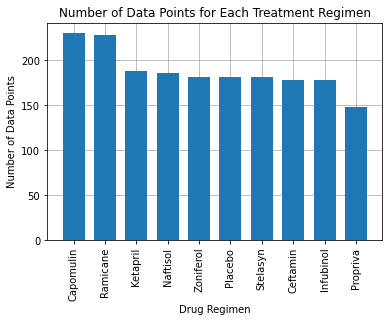

In [33]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

counts = clean_df['Drug Regimen'].value_counts()
x_axis = np.arange(len(counts))
plt.bar(x_axis, counts, width = 0.7, zorder=3)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title('Number of Data Points for Each Treatment Regimen')
plt.grid(zorder=0)
plt.show()

Text(0, 0.5, '')

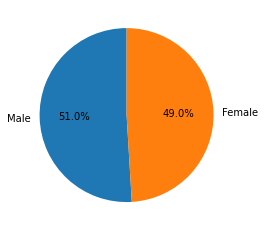

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

data = clean_df['Sex'].value_counts()
pie_plot = data.plot.pie(autopct="%1.1f%%", startangle=90)
pie_plot.set_ylabel('')

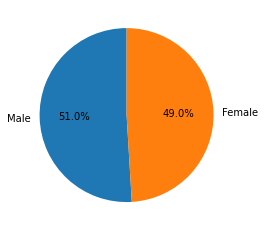

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
data = clean_df['Sex'].value_counts()
plt.pie(data, labels=data.index.values, autopct="%1.1f%%", startangle=90)
plt.show()

## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_time = pd.DataFrame(mouse_study.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max Timepoint'})
max_time

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_mousedata = pd.merge(mouse_study, max_time, on='Mouse ID')
merged_mousedata.sample(10)

# Put treatments into a list for for loop (and later for plot labels)

drug_regimens =['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

drug_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

for drug in drug_regimens:
    volume_df = merged_mousedata.loc[merged_mousedata['Drug Regimen']== drug]
    
    final_volume_df = volume_df.loc[volume_df['Timepoint'] ==volume_df['Max Timepoint']]
    values= final_volume_df['Tumor Volume (mm3)']
    drug_values.append(values)
    
    quartiles = values.quantile([.25,.5,.75])
    lowerq =quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    print(f'IQR for {drug}: {iqr}')
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    outliers = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) |
                          (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


In [38]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

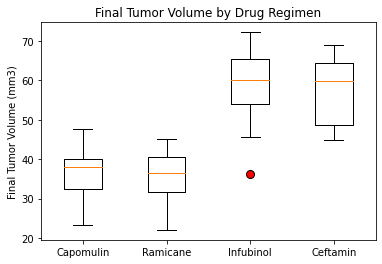

In [39]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

details = dict(marker='o', markerfacecolor='red', markersize=8, markeredgecolor= 'black')

plt.boxplot(drug_values, flierprops=details)
plt.title('Final Tumor Volume by Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

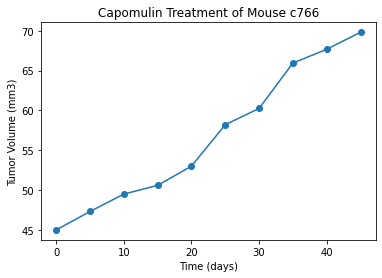

In [42]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


capomulin_data = mouse_study.loc[mouse_study['Mouse ID'] == 'c766']

plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker = 'o')
plt.xlabel ("Time (days)")
plt.ylabel ("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse c766")
plt.show()

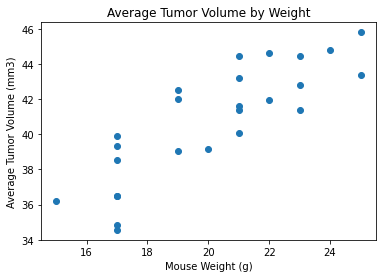

In [43]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_data_sp = mouse_study.loc[mouse_study['Drug Regimen'] == 'Capomulin']

avg_tumor_weight = pd.DataFrame(capomulin_data_sp.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})
avg_tumor_weight = pd.merge(capomulin_data_sp, avg_tumor_weight, on='Mouse ID')
final_tumor_weight = avg_tumor_weight [['Weight (g)','Average Tumor Volume']].drop_duplicates()
final_tumor_weight

x = final_tumor_weight['Weight (g)']
y = final_tumor_weight ['Average Tumor Volume']

plt.scatter(x,y)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()

## Correlation and Regression

The correlation coefficient between weight and average tumor volume on the Capomulin regimen is 0.84.


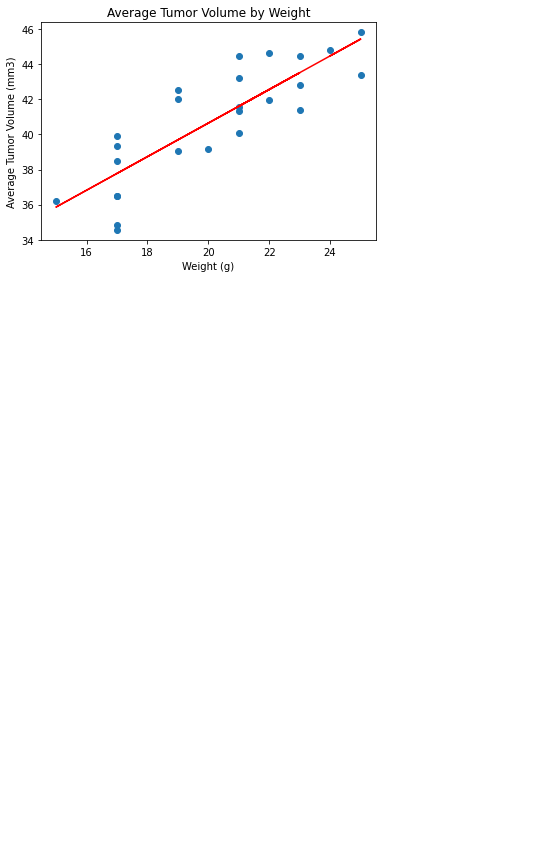

In [44]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
avg_tumor_weight = pd.DataFrame(capomulin_data_sp.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})
avg_tumor_weight = pd.merge(capomulin_data_sp, avg_tumor_weight, on='Mouse ID')
final_tumor_weight = avg_tumor_weight [['Weight (g)','Average Tumor Volume']].drop_duplicates()
final_tumor_weight

x = final_tumor_weight['Weight (g)']
y = final_tumor_weight ['Average Tumor Volume']

correlation = st.pearsonr(x,y)
print(f'The correlation coefficient between weight and average tumor volume on the Capomulin regimen is {round(correlation[0],2)}.')

(slope, intercept, rvalue, pvalue, stderr)= st.linregress(x,y)
regress_values = x * slope + intercept 
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
line_eq

plt.scatter(x,y)
plt.plot(x, regress_values, 'r-')

plt.annotate(line_eq,(25,0), fontsize=20, color='blue')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Weight')
plt.show()
